In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

In [2]:
!pip install keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.layers import Dropout 
from keras.models import load_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install imbalanced-learn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**ref:**

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://medium.com/@muhammetbolat/supervised-unsupervised-techniques-on-mnist-dataset-3f2ffd4c41c5



In [4]:
#choose to run with colab, run the following code in advance
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [5]:
def get_detaset():
    train_df = pd.read_csv('classification-of-mnist-digits/train.csv')
    train = train_df.to_numpy()
    test_df = pd.read_csv('classification-of-mnist-digits/test.csv')
    test = test_df.to_numpy()
    train_result_df = pd.read_csv('classification-of-mnist-digits/train_result.csv')
    train_result = train_result_df.to_numpy()
    return train, test, train_result

def split_testset(data):
    data = np.delete(data, -1, axis=1)
    #z-score standardization
    standardize_data = (data-np.mean(data, axis=1)[:,np.newaxis])/np.std(data, axis=1)[:,np.newaxis]
    return standardize_data

def treat_dataset(data, data_result):
    data = np.delete(data, -1, axis=1)
    #z-score standardization
    standardize_data = (data-np.mean(data, axis=1)[:,np.newaxis])/np.std(data, axis=1)[:,np.newaxis]
    data_result = np.delete(data_result, 0, axis=1)
    return data,data_result.flatten()

In [6]:
train, test, train_result = get_detaset()
test_data = split_testset(test)
X_train, y_train = treat_dataset(train, train_result)

<BarContainer object of 19 artists>

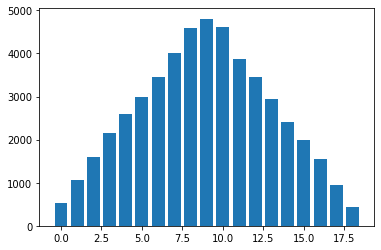

In [7]:
y = Counter(y_train)
plt.bar(y.keys(), y.values())

In [8]:
#oversample = RandomOverSampler(sampling_strategy='minority')
oversample = SMOTE()
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

<BarContainer object of 19 artists>

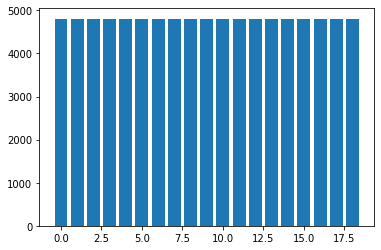

In [9]:
y_over = Counter(y_train_over)
plt.bar(y_over.keys(), y_over.values())

In [10]:
training_dataset_over_x = X_train_over.reshape(-1, 28, 56, 1)
training_dataset_x = X_train.reshape(-1, 28, 56, 1)
test_features = test_data.reshape(-1, 28, 56, 1)
training_dataset_over_x = training_dataset_over_x.astype('float32')
training_dataset_x = training_dataset_x.astype('float32')
test_features = test_features.astype('float32')

training_dataset_over_y = to_categorical(y_train_over)
training_dataset_y = to_categorical(y_train)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 56, 1), activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling2D-1'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling2D-2'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='Convolution-3'))
model.add(MaxPooling2D(name='MaxPooling2D-3'))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', name='Hidden-1'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', name='Hidden-2'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', name='Hidden-3'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', name='Hidden-4'))
model.add(Dense(19, activation='softmax', name='Output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 26, 54, 32)        320       
                                                                 
 MaxPooling2D-1 (MaxPooling2  (None, 13, 27, 32)       0         
 D)                                                              
                                                                 
 Convolution-2 (Conv2D)      (None, 11, 25, 64)        18496     
                                                                 
 MaxPooling2D-2 (MaxPooling2  (None, 5, 12, 64)        0         
 D)                                                              
                                                                 
 Convolution-3 (Conv2D)      (None, 3, 10, 64)         36928     
                                                                 
 MaxPooling2D-3 (MaxPooling2  (None, 1, 5, 64)         0

In [12]:
EPOCHS = 15
BATCH_SIZE = 64
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_over_x, training_dataset_over_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/15
1142/1142 [==============================] - 153s 133ms/step - loss: 0.8975 - accuracy: 0.7030 - val_loss: 0.2433 - val_accuracy: 0.9243
Epoch 2/15
1142/1142 [==============================] - 147s 129ms/step - loss: 0.1778 - accuracy: 0.9483 - val_loss: 0.0902 - val_accuracy: 0.9731
Epoch 3/15
1142/1142 [==============================] - 148s 130ms/step - loss: 0.1064 - accuracy: 0.9686 - val_loss: 0.0949 - val_accuracy: 0.9742
Epoch 4/15
1142/1142 [==============================] - 146s 128ms/step - loss: 0.0740 - accuracy: 0.9779 - val_loss: 0.0950 - val_accuracy: 0.9694
Epoch 5/15
1142/1142 [==============================] - 146s 128ms/step - loss: 0.0592 - accuracy: 0.9825 - val_loss: 0.0384 - val_accuracy: 0.9894
Epoch 6/15
1142/1142 [==============================] - 146s 127ms/step - loss: 0.0470 - accuracy: 0.9860 - val_loss: 0.0204 - val_accuracy: 0.9936
Epoch 7/15
1142/1142 [==============================] - 148s 129ms/step - loss: 0.0378 - accuracy: 0.9889 - val_

In [13]:
loss, accuracy = model.evaluate(training_dataset_x, training_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

1563/1563 [==============================] - 34s 22ms/step - loss: 0.0091 - accuracy: 0.9973
loss = 0.009062886238098145, accuracy = 0.9973199963569641


In [14]:
pred = model.predict(test_features)
test_preds = np.argmax(pred, axis = 1)
df_submit = pd.DataFrame(test_preds, columns = ['Class'])
# submission
df_submit=df_submit.reset_index()
df_submit.rename(columns = {'index':'Index'}, inplace = True)
df_submit.to_csv('./CNN.csv', index = False)

313/313 [==============================] - 6s 19ms/step


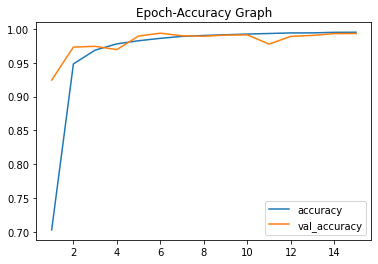

In [15]:
plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [17]:
model.save('CNN.h5')

In [18]:
model = load_model('CNN.h5')

https://medium.com/swlh/how-to-perform-keras-hyperparameter-optimization-x3-faster-on-tpu-for-free-602b97812602

Hyperparameters can be optimized further

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, Activation

def fashion_mnist_fn(x_train, y_train, x_val, y_val, params):
    conv_dropout = float(params['conv_dropout'])
    dense1_neuron = int(params['dense1_neuron'])
    model = Sequential()
    model.add(BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(Conv2D(64, (5, 5), padding='same', activation=params['activation']))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(conv_dropout))

    model.add(BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(Conv2D(128, (5, 5), padding='same', activation=params['activation']))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_dropout))

    model.add(BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(Conv2D(256, (5, 5), padding='same', activation=params['activation']))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(conv_dropout))

    model.add(Flatten())
    model.add(Dense(dense1_neuron))
    model.add(Activation(params['activation']))
    model.add(Dropout(0.5))
    model.add(Dense(19))
    model.add(Activation('softmax'))
  
    model.compile(
        optimizer='adam', # tf.train.AdamOptimizer(learning_rate=1e-3, )
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )


    out = model.fit(
        x, y, epochs=4, batch_size=64, 
        verbose=0,
        validation_data=[x_val, y_val]
    )
    return out, model

In [ ]:
!pip install talos

In [ ]:
import talos as ta

para = {
    'dense1_neuron': [256, 512],
    'activation': ['relu', 'elu'],
    'conv_dropout': [0.25, 0.4]
}

In [ ]:
x=training_dataset_over_x
y=training_dataset_over_y
scan_results = ta.Scan(x, y, para, fashion_mnist_fn,experiment_name='try')